In [7]:
ra=83.633080
dec=22.014500
radius=15.
T1_utc='2003-03-15T23:27:40.0'
T2_utc='2018-03-16T00:03:15.0'
E1_keV=20.
E2_keV=40.
instrument='isgri'
product='isgri_image'
osa_version='OSA10.2'

In [8]:
from oda_api.api import DispatcherAPI
import os

In [9]:
cookies=dict(_oauth2_proxy=open(os.environ.get('HOME')+'/.odaapi-token').read().strip())
disp=DispatcherAPI(host='analyse-staging-1.2.reproducible.online/dispatch-data',instrument='mock',cookies=cookies,protocol='https')
#disp=DispatcherAPI(host='astro.unige.ch/cdci/astrooda_/dispatch-data',protocol='https')

In [10]:
data=disp.get_product(
                      RA=ra,
                      DEC=dec,
                      radius=radius,
                      T1=T1_utc,
                      T2=T2_utc,
                      E1_keV=E1_keV,
                      E2_keV=E2_keV,
                      instrument=instrument,
                      product=product,
                      osa_version=osa_version)

waiting for remote response, please wait run_analysis https://analyse-staging-1.2.reproducible.online/dispatch-data


query done succesfully!


In [11]:
data.mosaic_image_0.show()
data.mosaic_image_0.write_fits_file('image.fits',overwrite=True)

------------------------------
name: mosaic_image
meta_data dict_keys(['src_name', 'instrument', 'product', 'query_parameters'])
number of data units 2
------------------------------
data uniti 0 ,name: Primary
data uniti 1 ,name: ISGR-MOSA-IMA


In [12]:
from astropy.io import fits
from astropy.wcs import WCS
hdul = fits.open('image.fits')
wcs = WCS(hdul[1].header)
image = hdul[1].data

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


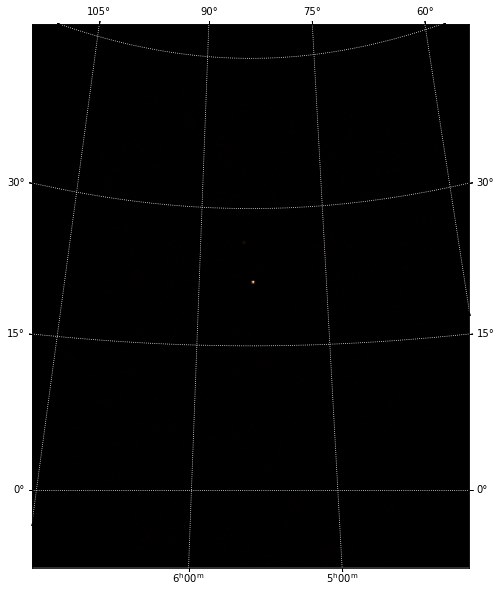

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(projection=wcs)
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
plt.imshow(image, cmap='copper')
plt.savefig('image.png')

In [14]:
image_png='image.png'
image_fits='image.fits'